# Importing the Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

# Model Initialization

In [3]:
cascpath="C:\opencv\sources\data\haarcascades\haarcascade_frontalface_default.xml"

In [4]:
eyepath="C:\opencv\sources\data\haarcascades\haarcascade_eye.xml"
smilepath="C:\opencv\sources\data\haarcascades\haarcascade_smile.xml"

In [5]:
faceCascade=cv2.CascadeClassifier(cascpath)

In [6]:
eyeCascade=cv2.CascadeClassifier(eyepath)
smileCascade=cv2.CascadeClassifier(smilepath)

In [7]:
font=cv2.FONT_HERSHEY_SIMPLEX

# Detecting Face on a Image

In [8]:
path1=r"C:\Users\Rupankar\Desktop\Kaggle\Road'sEye\roadeye-master\Core\roadeye\My_Pic.jpeg"

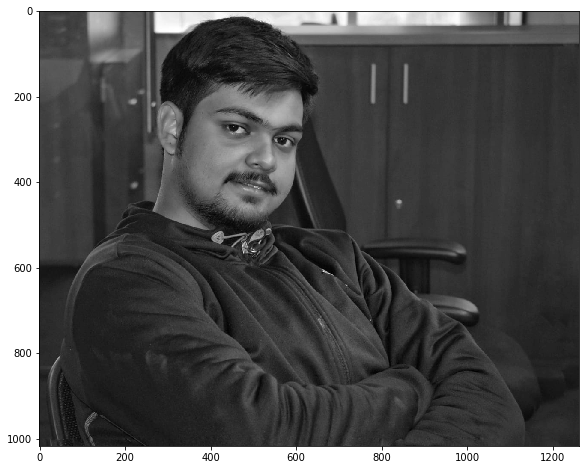

In [9]:
if os.path.isfile(path1):
    gray = cv2.imread(path1, 0)
    plt.figure(figsize=(12,8))
    plt.imshow(gray, cmap='gray')
    plt.show()
else:
    print ("The file " + path1 + " does not exist.")

In [10]:
faces = faceCascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)


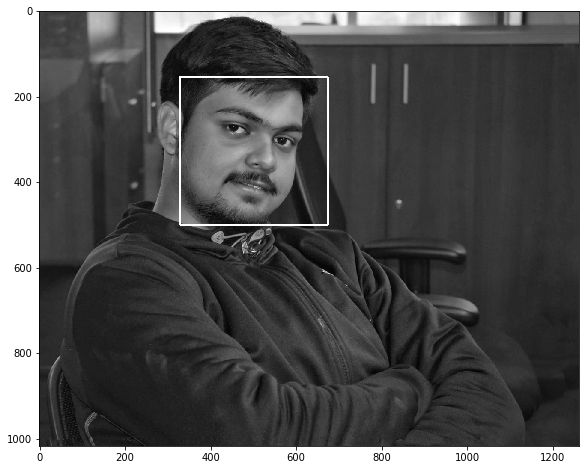

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

# Real -Time Face Detection

In [12]:
video_capture = cv2.VideoCapture(0)

In [ ]:
while True:
    ret, img = video_capture.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        # this one should be inside the 'faces' loop
        for(ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew,ey+eh), (0,255,0), 2)
            cv2.putText(img,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)
        smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
            cv2.putText(img,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
        cv2.putText(img,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break